# Lab 4 Electronics

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii #lets you import CSV data
plt.style.use('default')

In [19]:
# Inport the data

data = ascii.read("LAB4_data.txt")

In [21]:
# Define the data

time = data.columns[0]
outp = data.columns[1]
inp = data.columns[2]

<IPython.core.display.Javascript object>


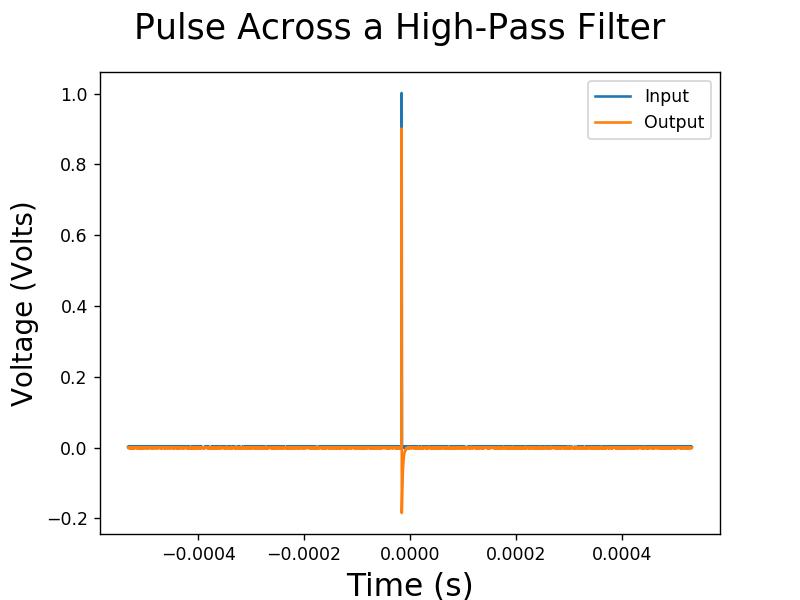

Text(0, 0.5, 'Voltage (Volts)')

In [5]:


fig = plt.figure()
plt.plot(time, inp, label='Input') # Plot of the fit
plt.plot(time, outp, label='Output') # Plot of the fit
plt.legend()
fig.suptitle('Pulse Across a High-Pass Filter', fontsize=20)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Voltage (Volts)', fontsize=16)

Plotting Fourier transform data

<IPython.core.display.Javascript object>


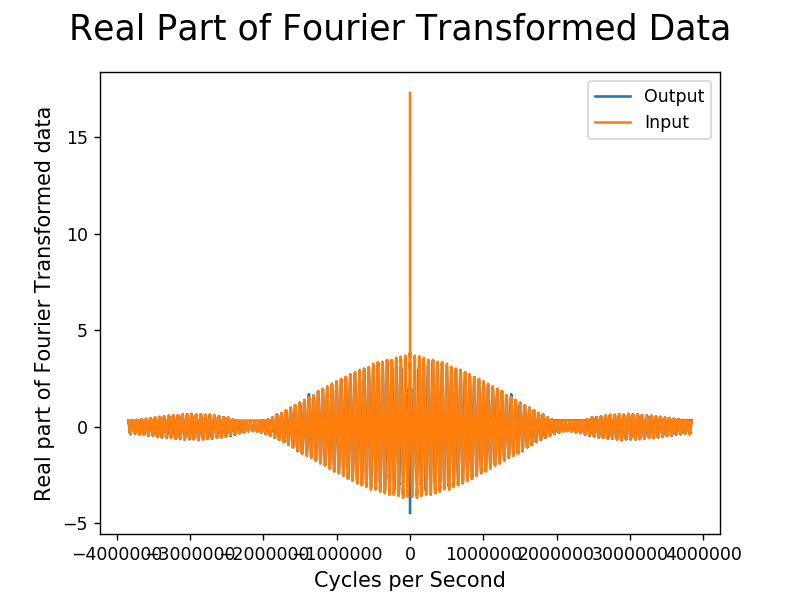

Text(0, 0.5, 'Real part of Fourier Transformed data')

In [6]:
xdat = np.fft.fftfreq(8192, ((np.max(time)-np.min(time))/(8192-1)))
outpRe = np.real(np.fft.fft(np.fft.fftshift(outp)))
inpRe = np.real(np.fft.fft(np.fft.fftshift(inp)))

fig = plt.figure()
plt.plot(xdat, outpRe, label='Output')
plt.plot(xdat, inpRe, label='Input')
plt.legend()
fig.suptitle('Real Part of Fourier Transformed Data', fontsize=20)
plt.xlabel('Cycles per Second', fontsize=12)
plt.ylabel('Real part of Fourier Transformed data', fontsize=12)

Has phase shift, time value not exactly centered

<IPython.core.display.Javascript object>


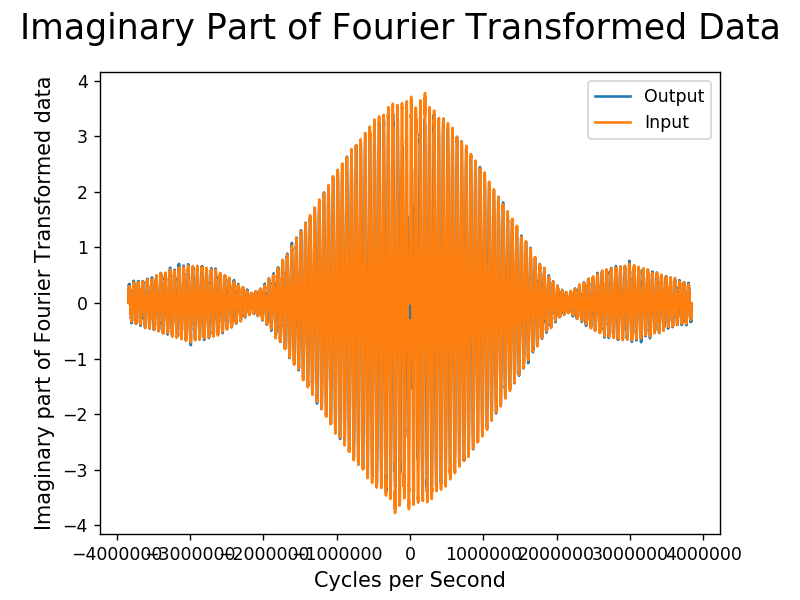

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

In [7]:
outpImg = np.imag(np.fft.fft(np.fft.fftshift(outp)))
inpImg = np.imag(np.fft.fft(np.fft.fftshift(inp)))

fig = plt.figure()
plt.plot(xdat, outpImg, label='Output')
plt.plot(xdat, inpImg, label='Input')
plt.legend()
fig.suptitle('Imaginary Part of Fourier Transformed Data', fontsize=20)
plt.xlabel('Cycles per Second', fontsize=12)
plt.ylabel('Imaginary part of Fourier Transformed data', fontsize=12)

## Theoretical versus Experimental

<IPython.core.display.Javascript object>


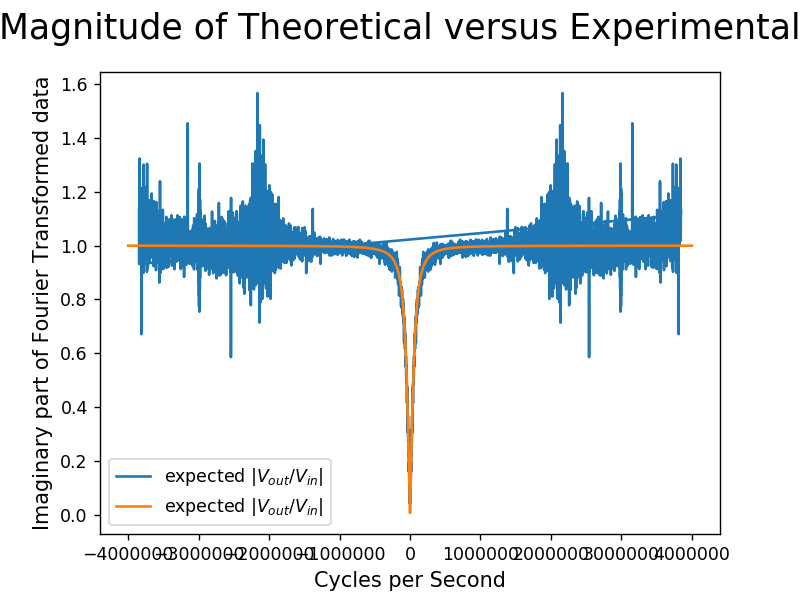

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

In [23]:
R = 200
C = 10*10**-9
freqarray = np.linspace(-4*10**6, 4*10**6, 8192)

mag = np.abs(np.fft.fft(np.fft.fftshift(outp)))/np.abs(np.fft.fft(np.fft.fftshift(inp)))
plt.close()
fig = plt.figure()
plt.plot(xdat, mag, label= 'expected $|V_{out}/V_{in}|$')
plt.plot(freqarray, np.sqrt(R**2/(R**2+1/(2*np.pi*freqarray)**2/C**2)), label= 'expected $|V_{out}/V_{in}|$')
plt.legend()
fig.suptitle('Magnitude of Theoretical versus Experimental', fontsize=20)
plt.xlabel('Cycles per Second', fontsize=12)
plt.ylabel('Imaginary part of Fourier Transformed data', fontsize=12)

<IPython.core.display.Javascript object>


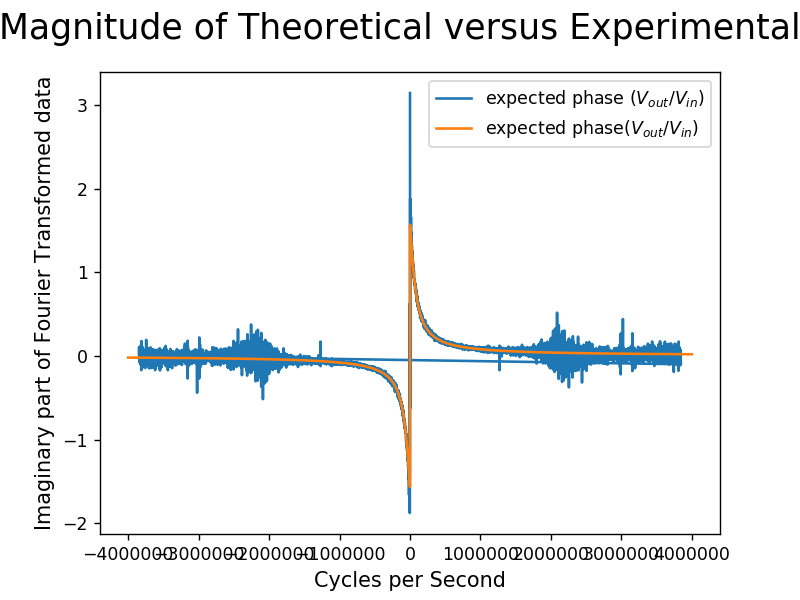

Text(0, 0.5, 'Imaginary part of Fourier Transformed data')

In [25]:
fig = plt.figure()

phase = np.angle((np.fft.fft(np.fft.fftshift(outp)))/(np.fft.fft(np.fft.fftshift(inp))))
plt.plot(xdat, phase, label='expected phase $(V_{out}/V_{in})$')
plt.plot(freqarray,np.angle(R/(R+1/(1j*2*np.pi*freqarray*C))),label='expected phase$(V_{out}/V_{in})$')
plt.legend()
fig.suptitle('Magnitude of Theoretical versus Experimental', fontsize=20)
plt.xlabel('Cycles per Second', fontsize=12)
plt.ylabel('Imaginary part of Fourier Transformed data', fontsize=12)

<IPython.core.display.Javascript object>


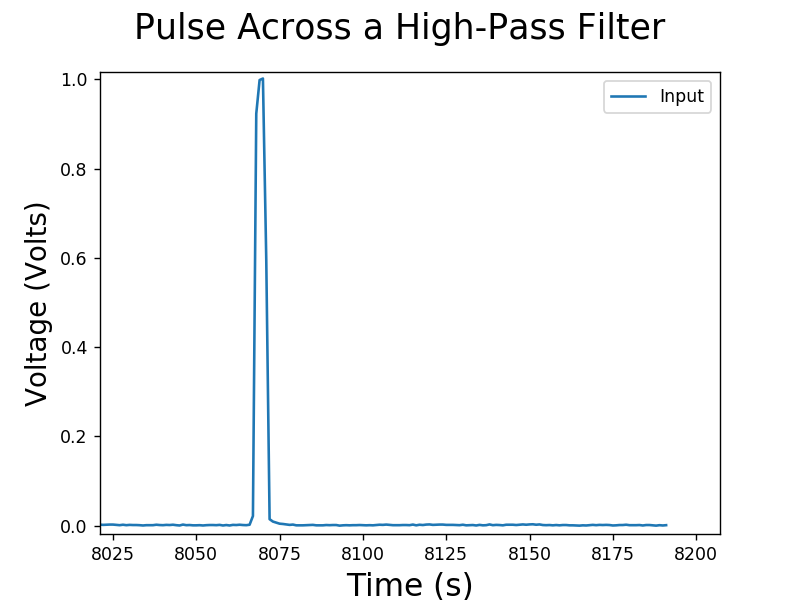

Text(0, 0.5, 'Voltage (Volts)')

In [18]:
# This shows that for some reason the data is shifted slightly from 0.

fig = plt.figure()
plt.plot(np.fft.fftshift(inp), label='Input')
plt.legend()
fig.suptitle('Pulse Across a High-Pass Filter', fontsize=20)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Voltage (Volts)', fontsize=16)